## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('concrete_data.csv')
data.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [3]:
data.shape

(1030, 9)

In [4]:
data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data=data.rename({"fine_aggregate ":"fine_aggregate"},axis=1)

## Statistical and Multivariate analysis

In [7]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [8]:
data.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

## Data Visualization

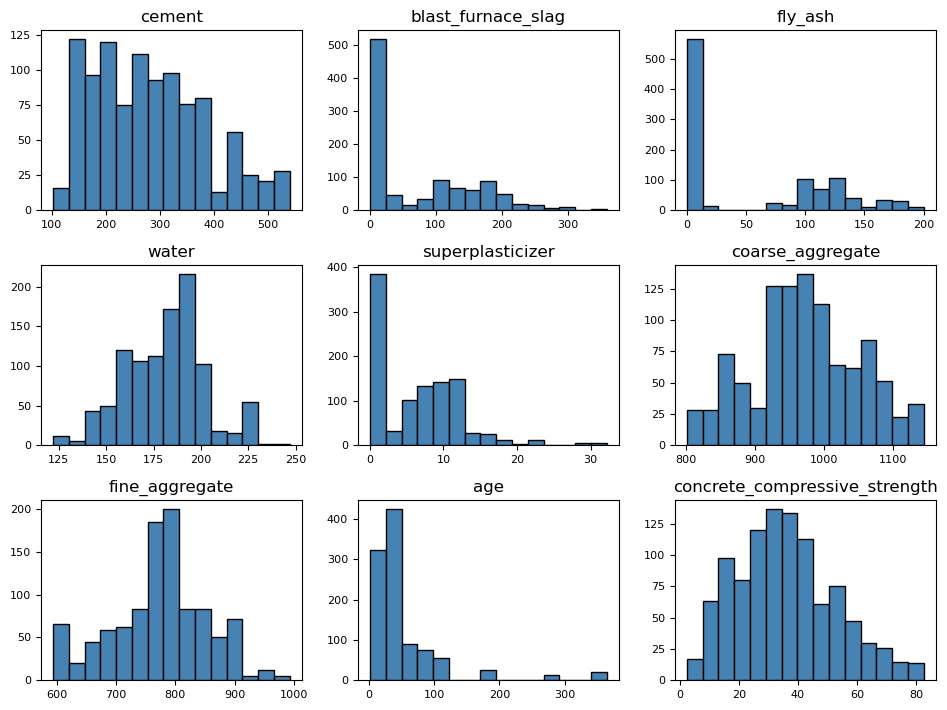

In [9]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

C:\Users\nithin\AppData\Local\Temp\ipykernel_21480\3873412550.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


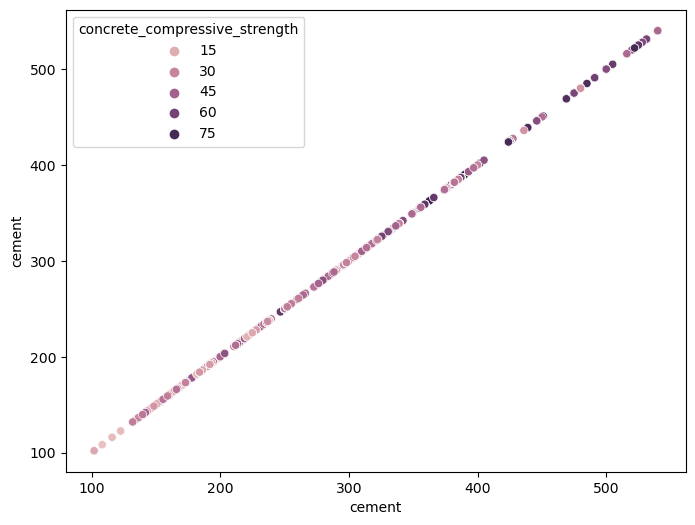

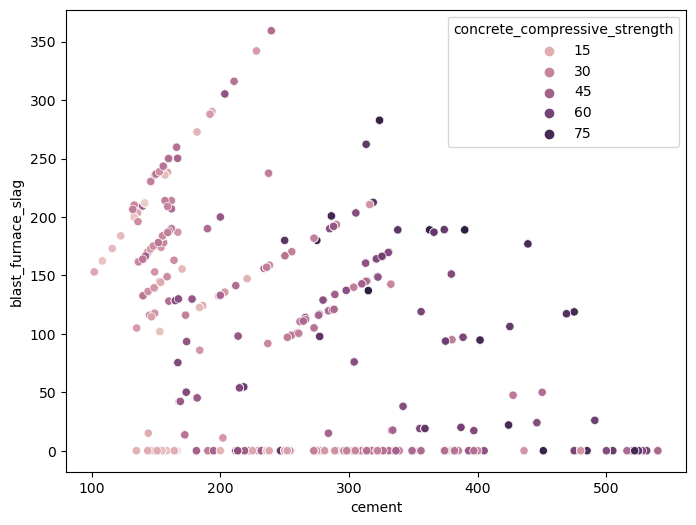

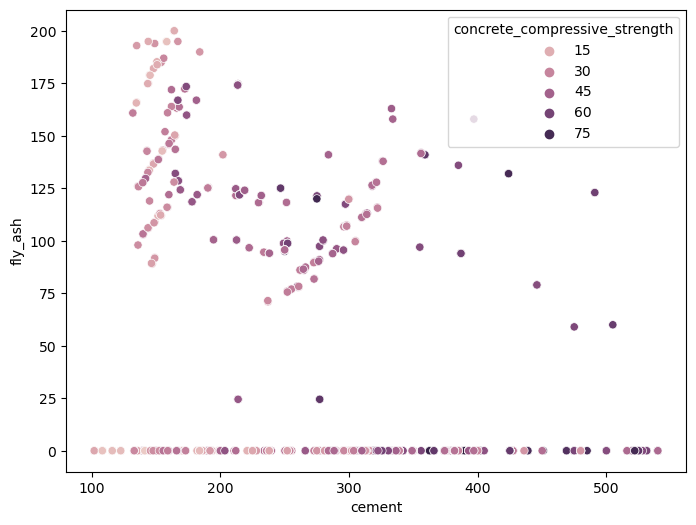

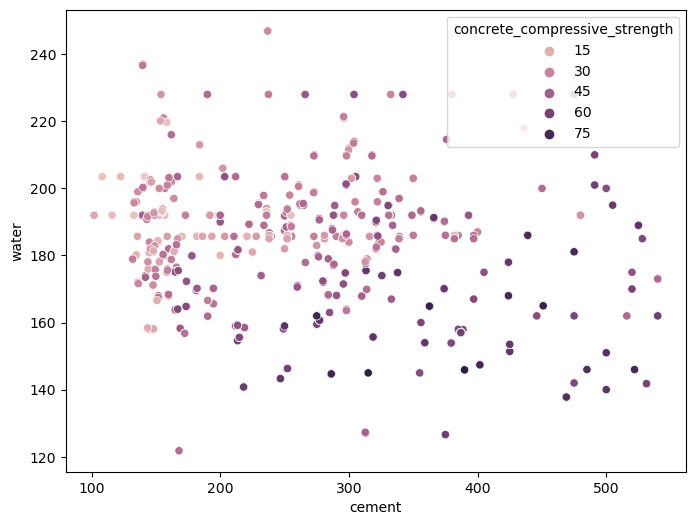

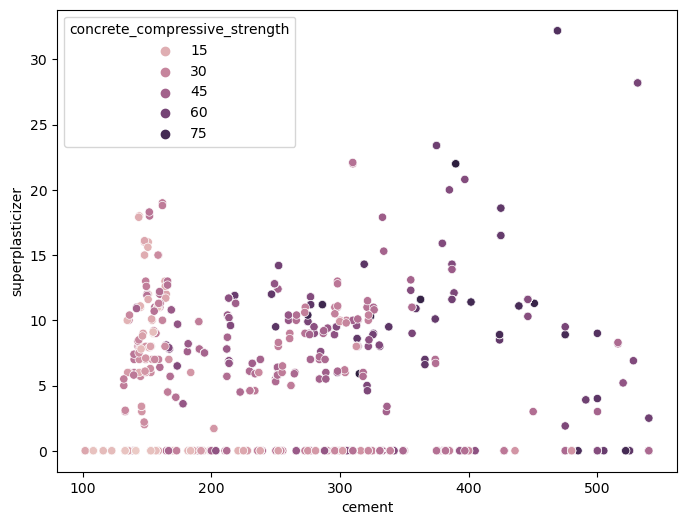

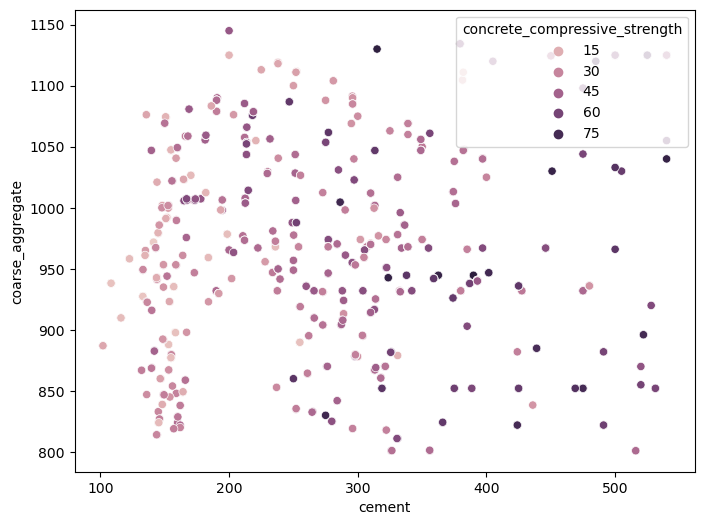

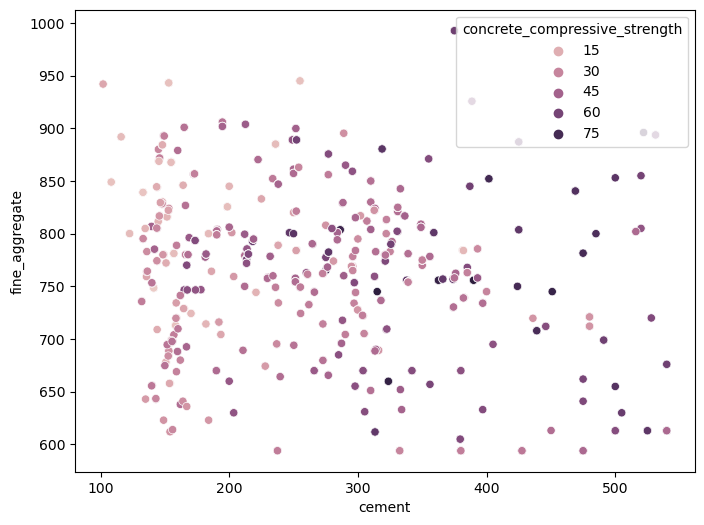

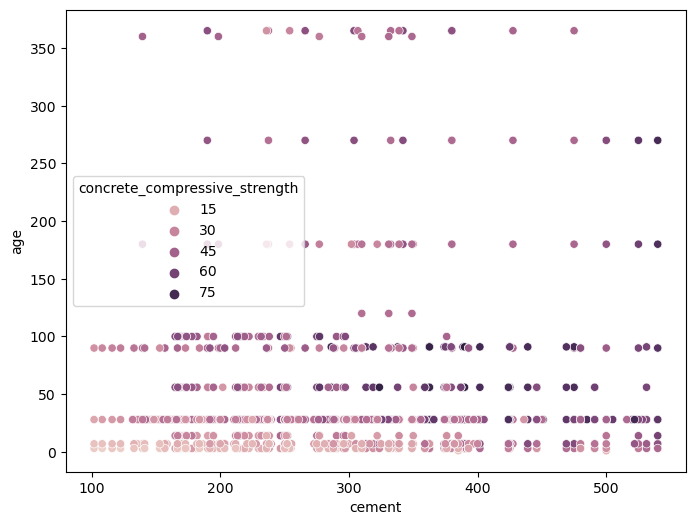

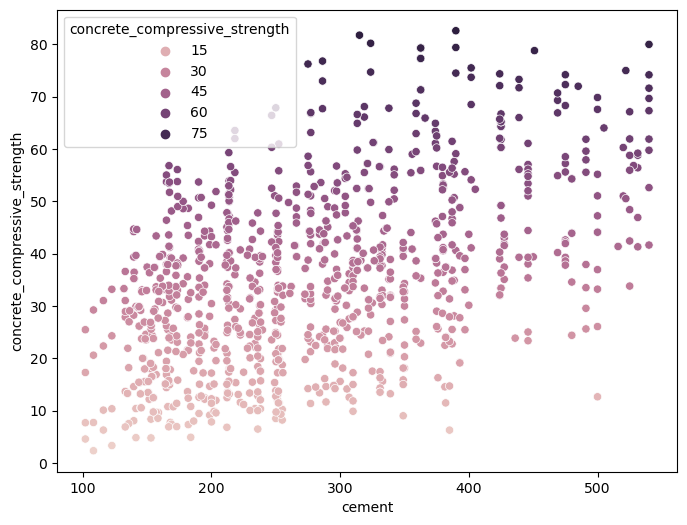

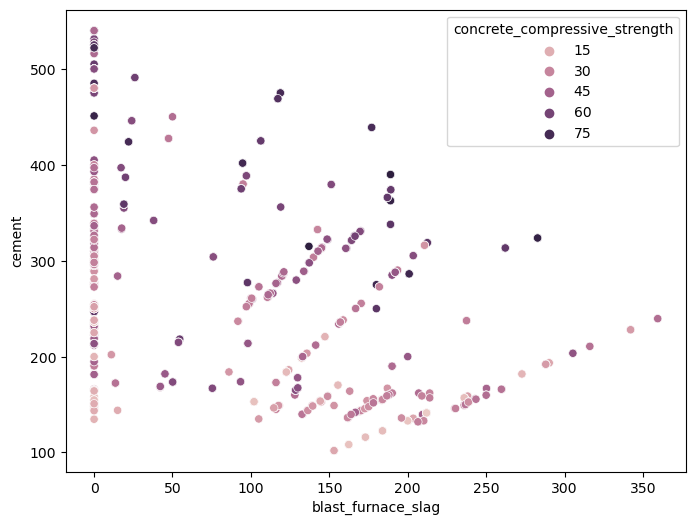

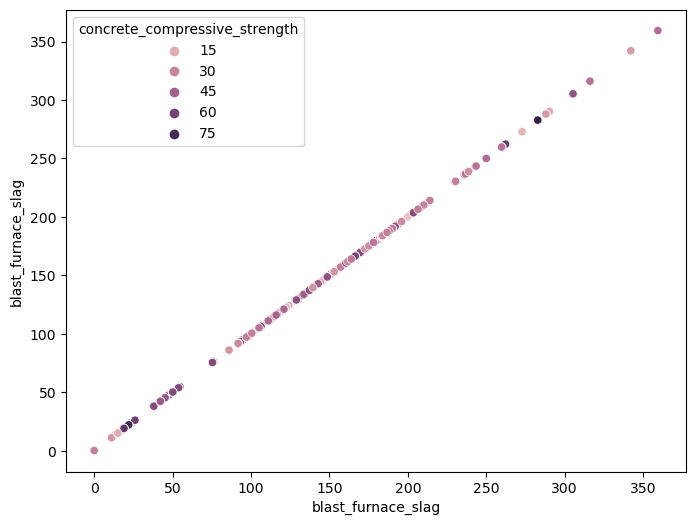

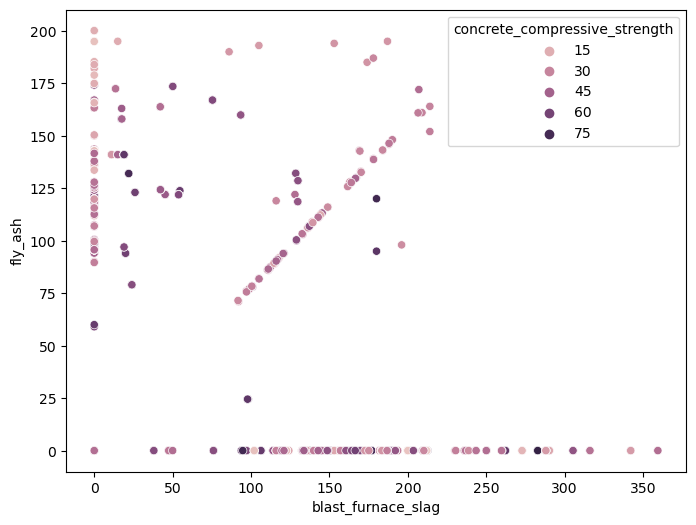

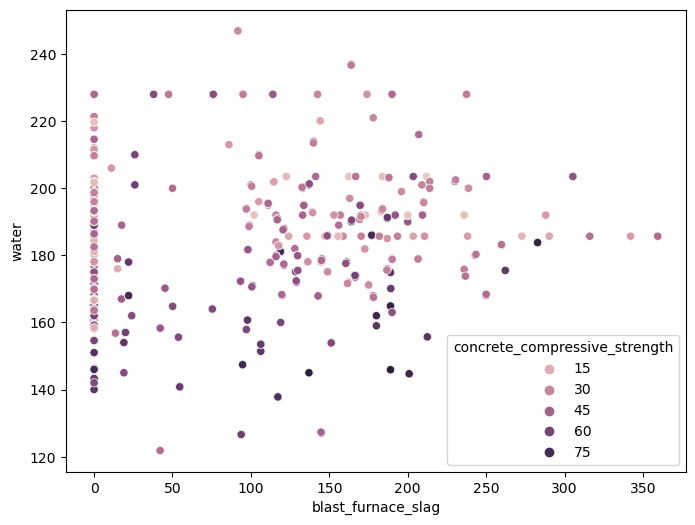

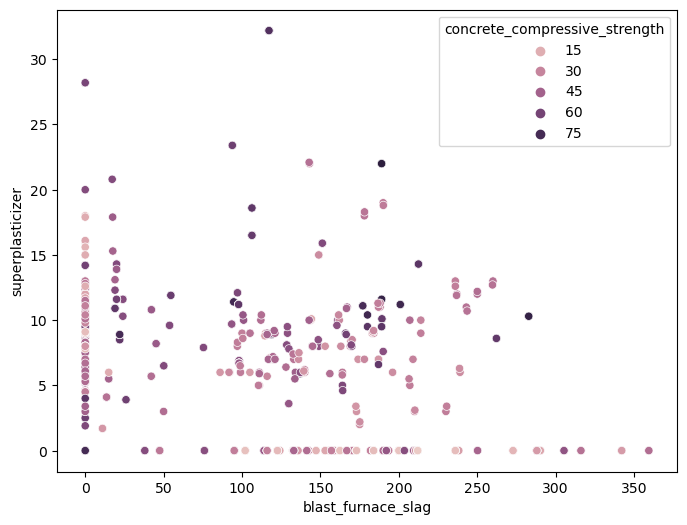

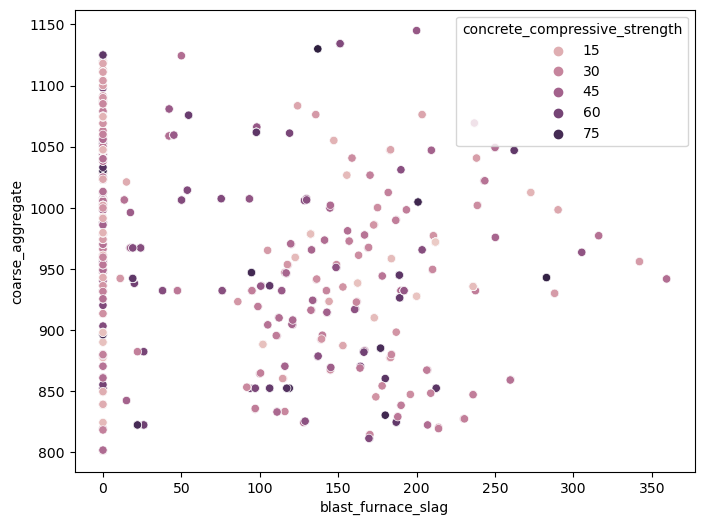

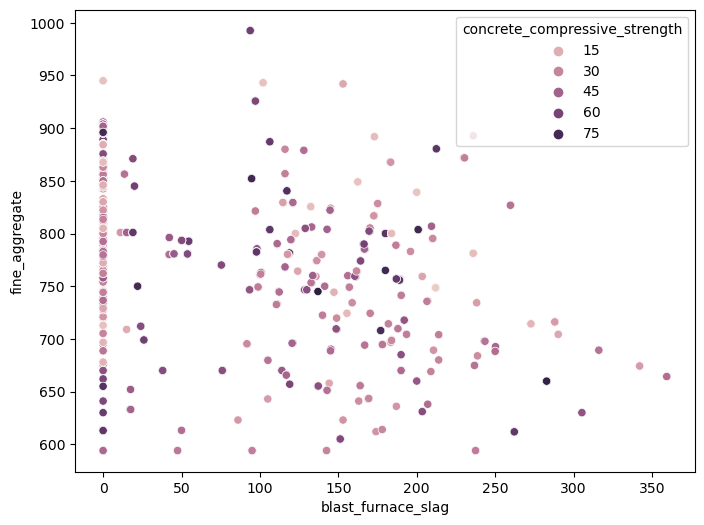

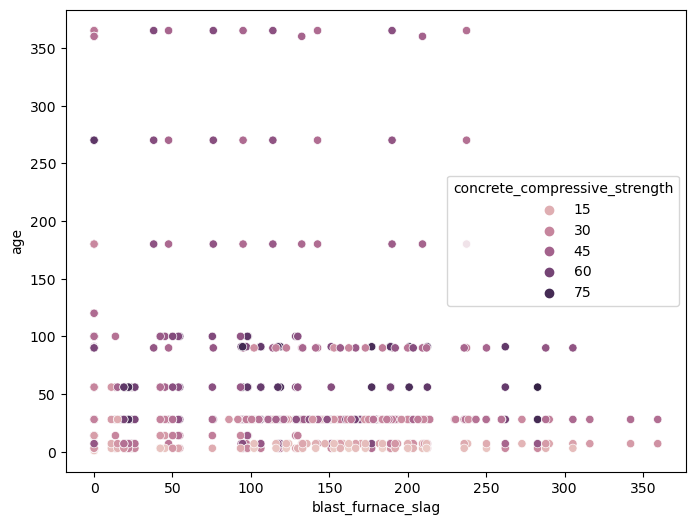

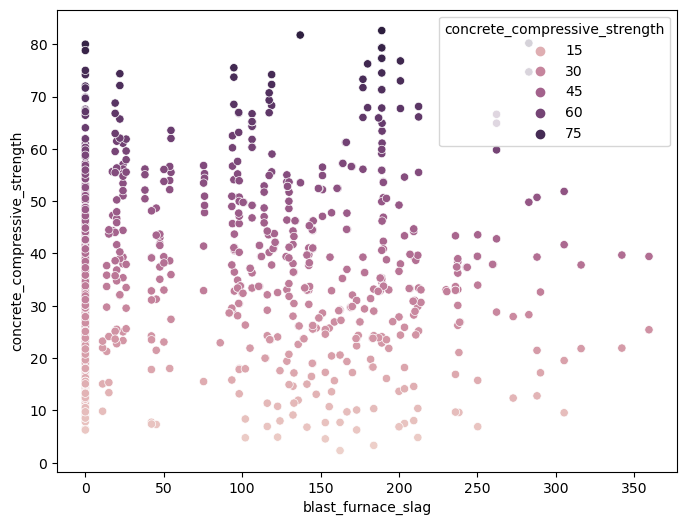

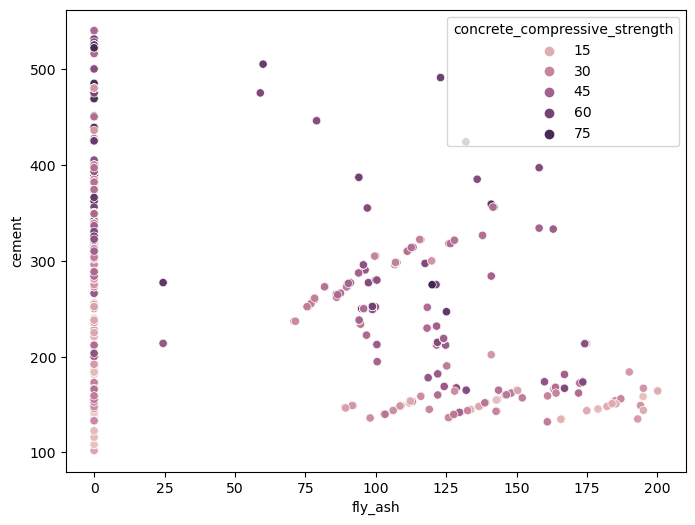

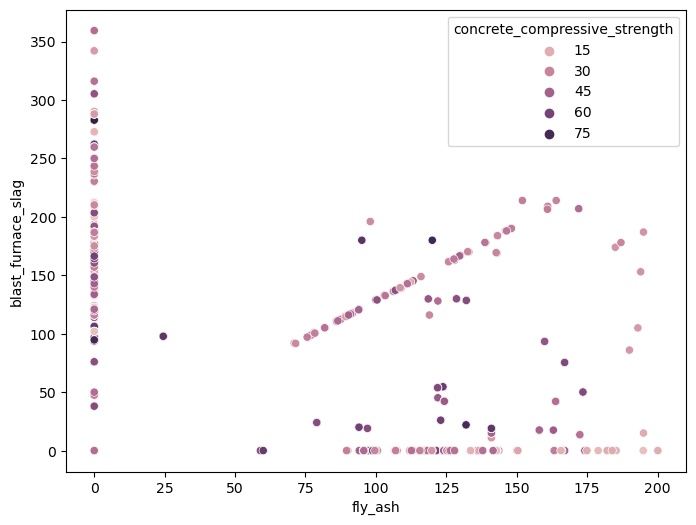

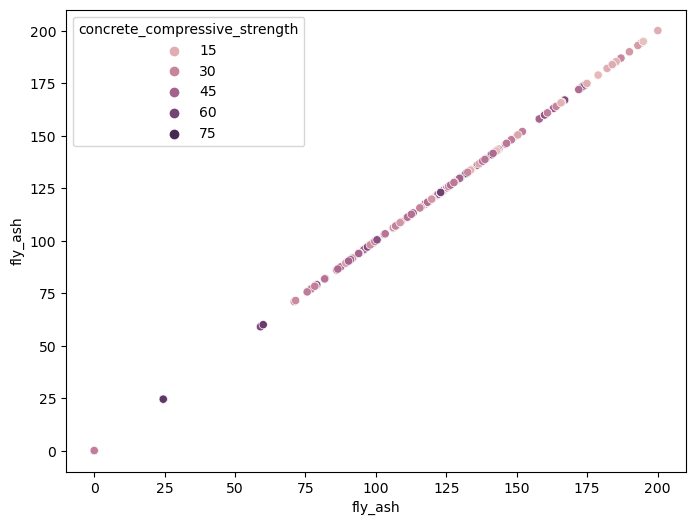

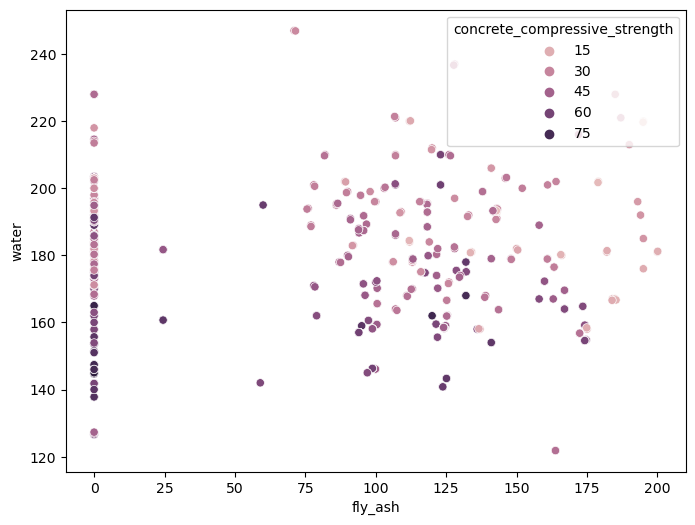

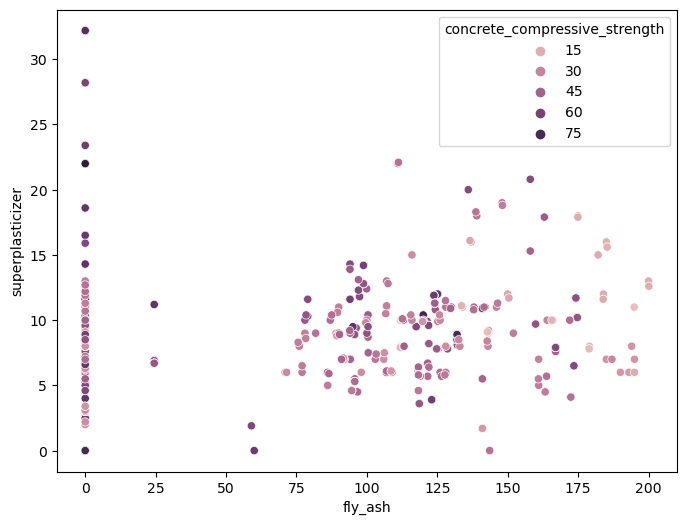

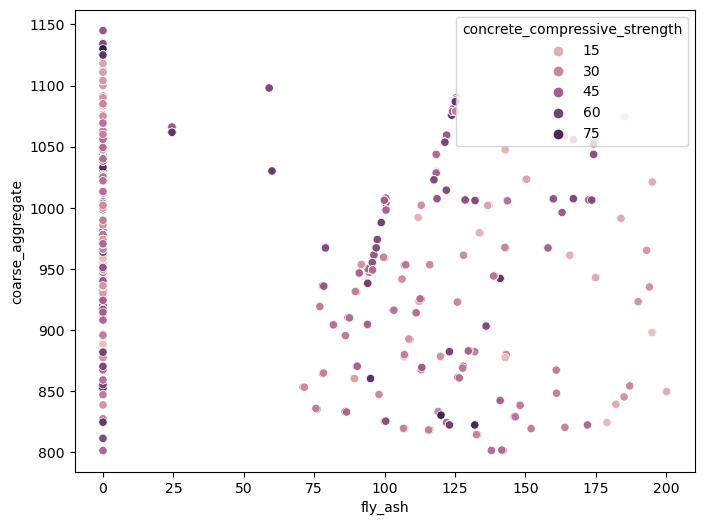

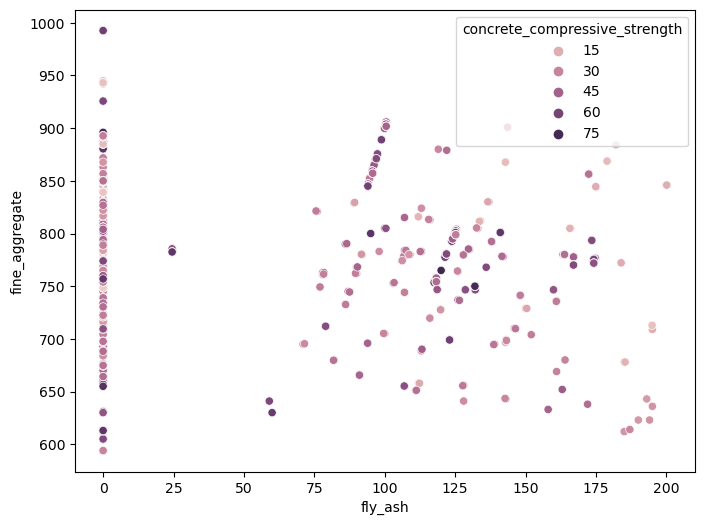

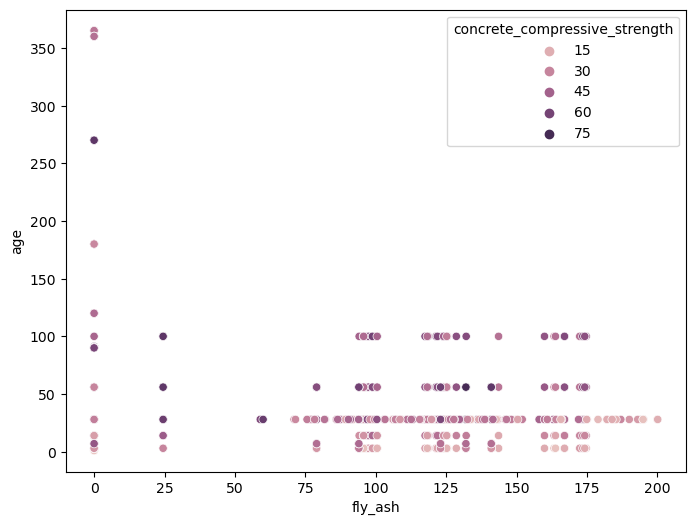

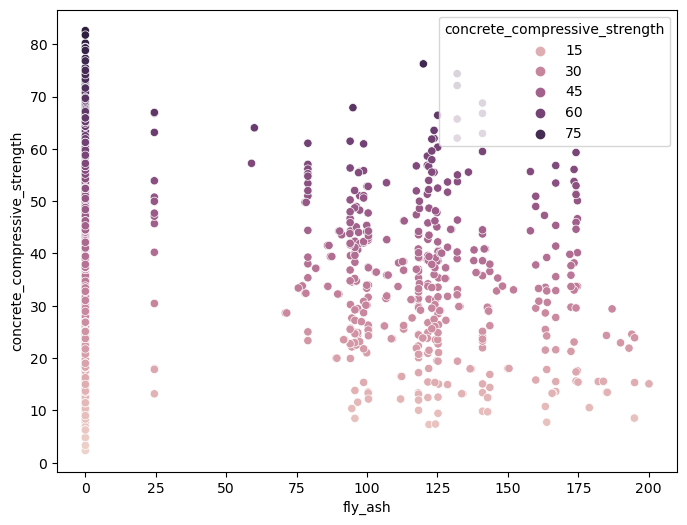

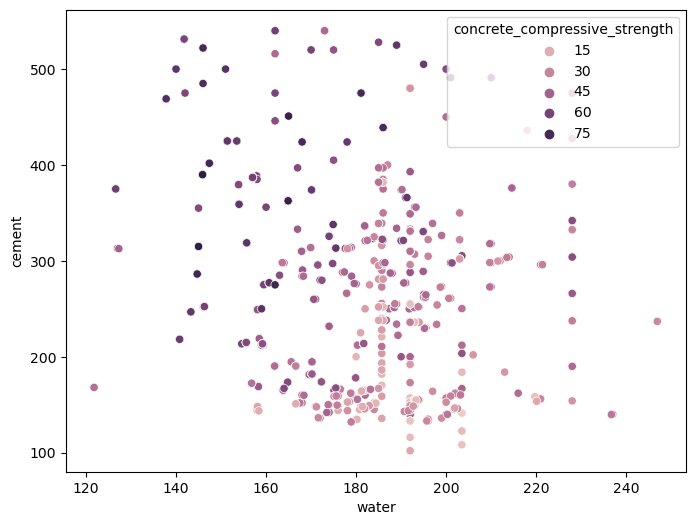

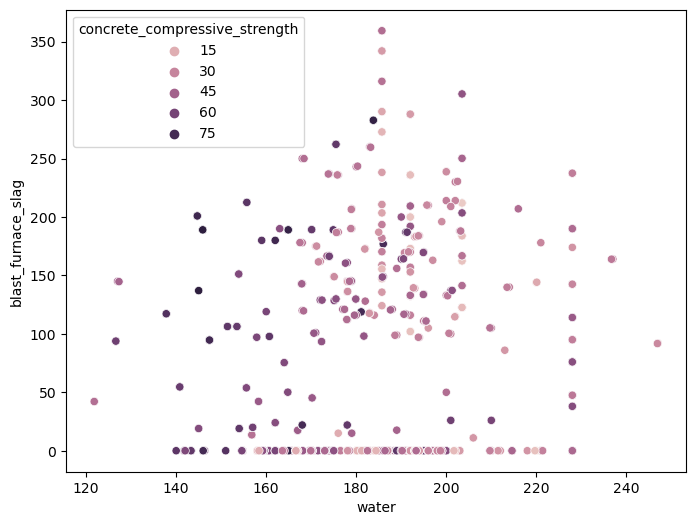

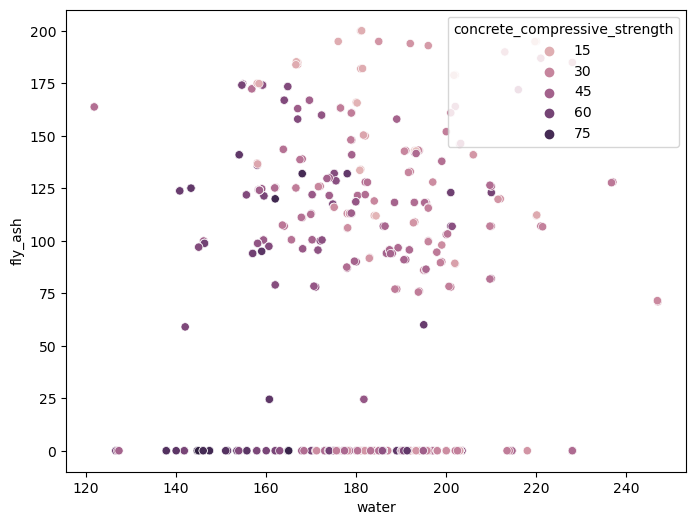

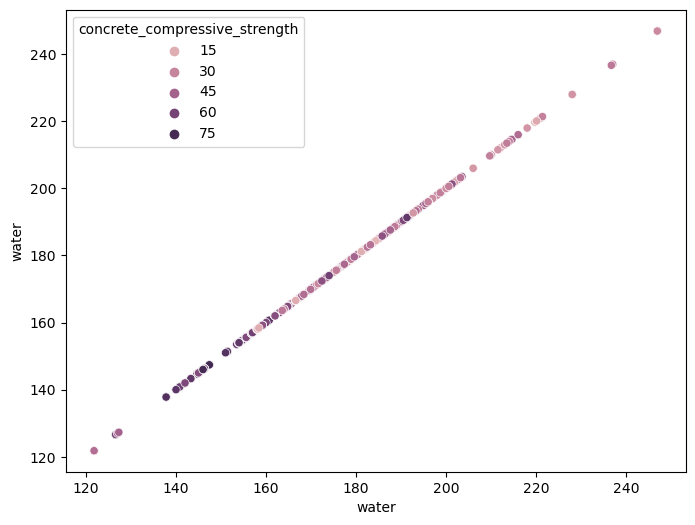

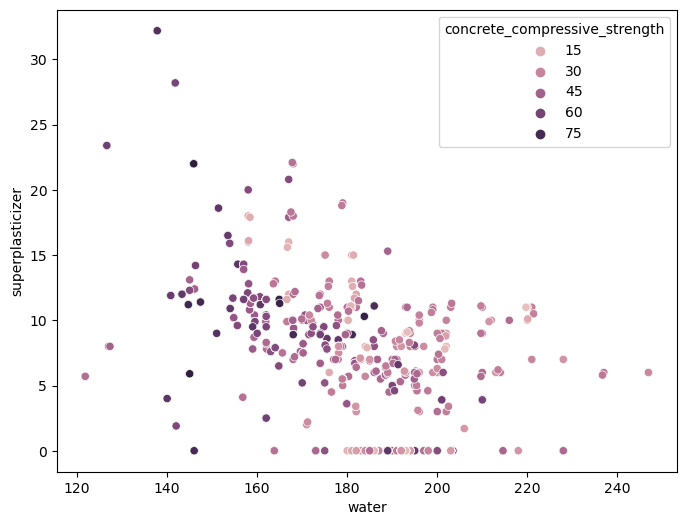

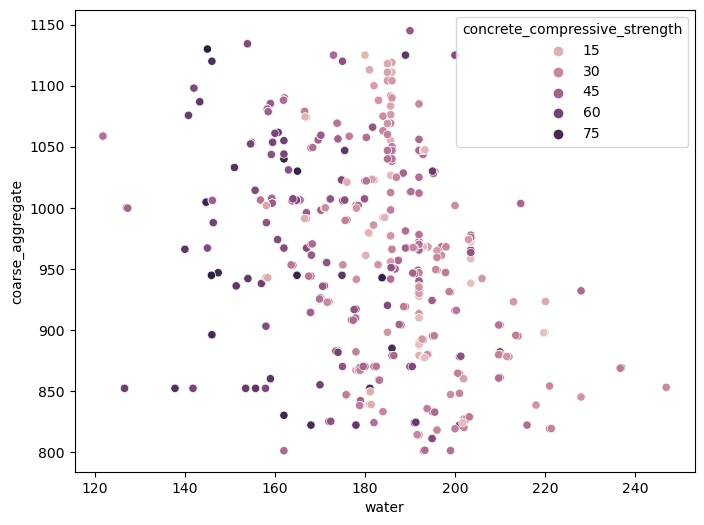

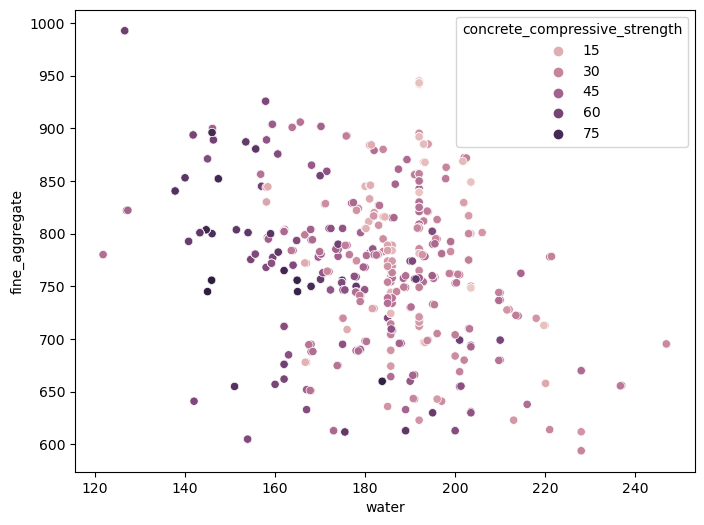

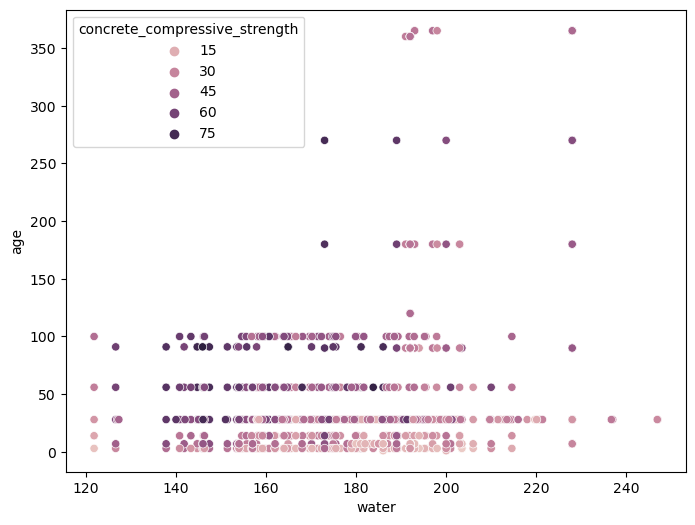

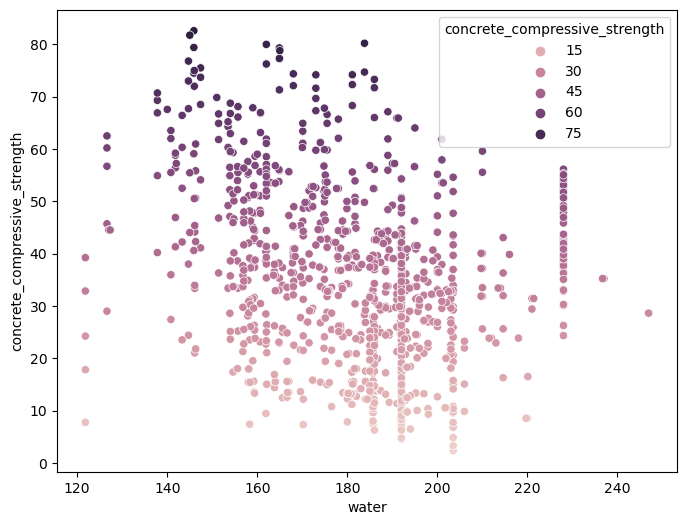

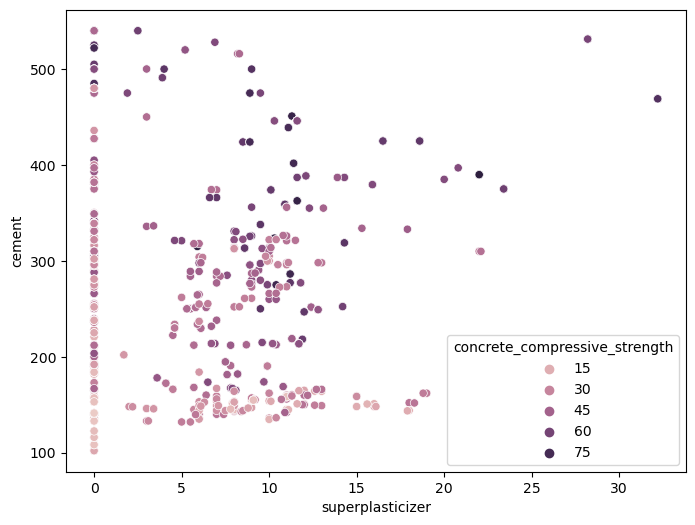

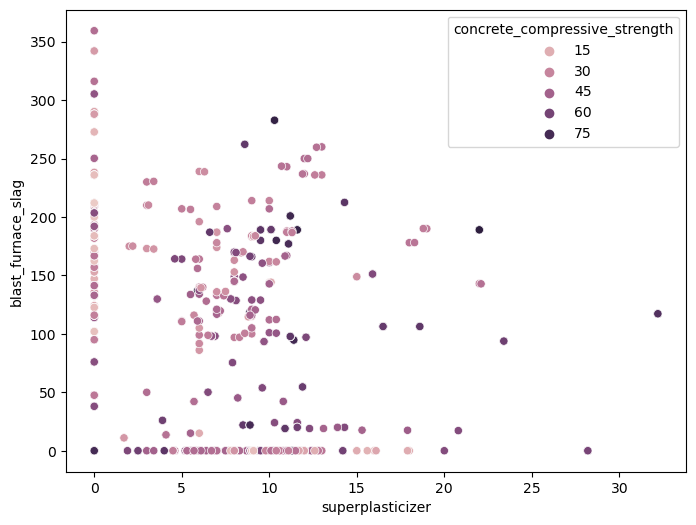

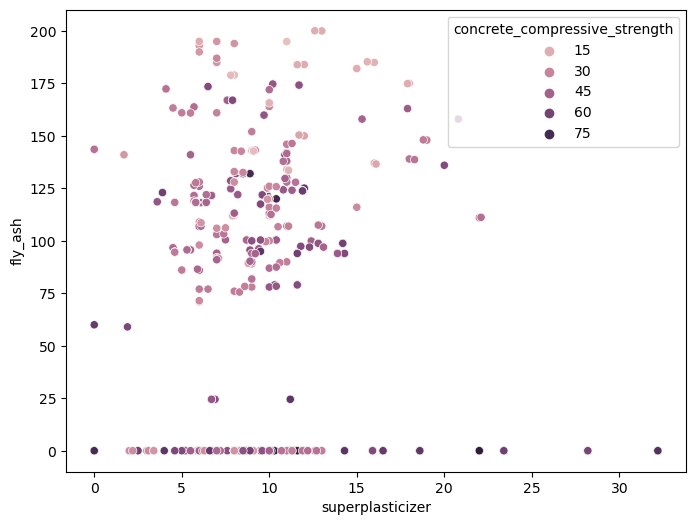

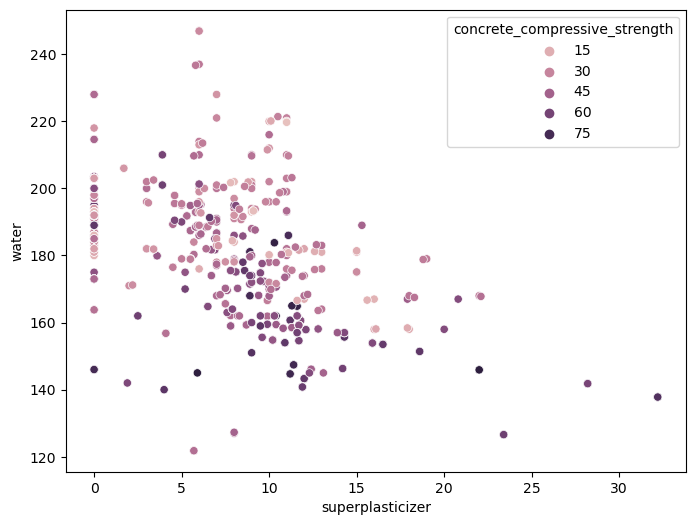

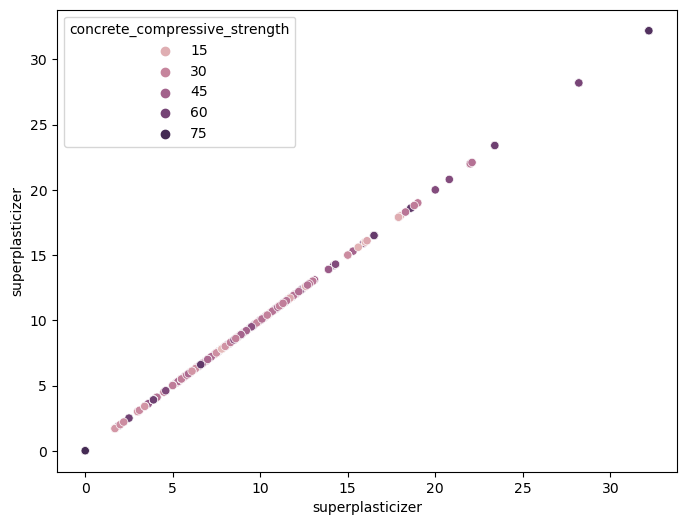

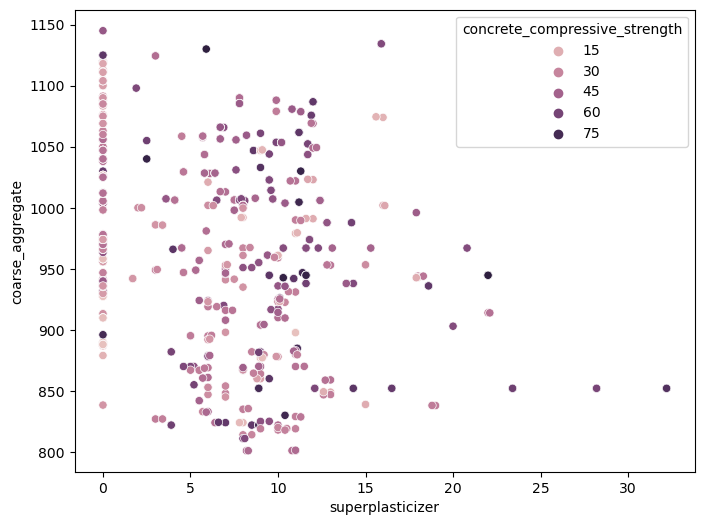

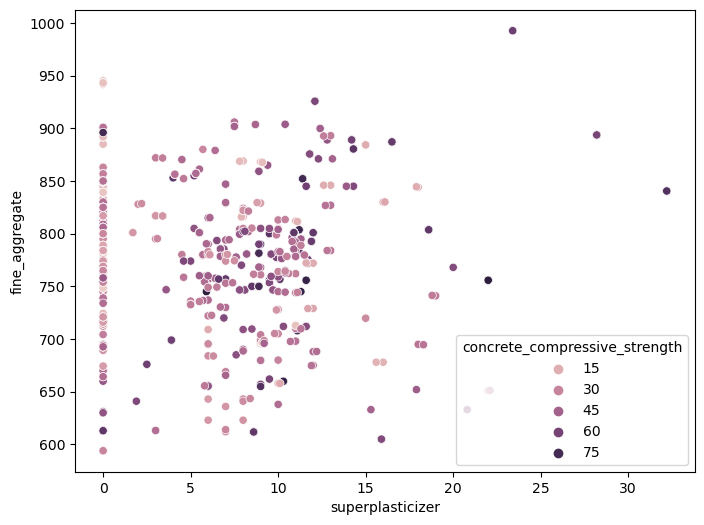

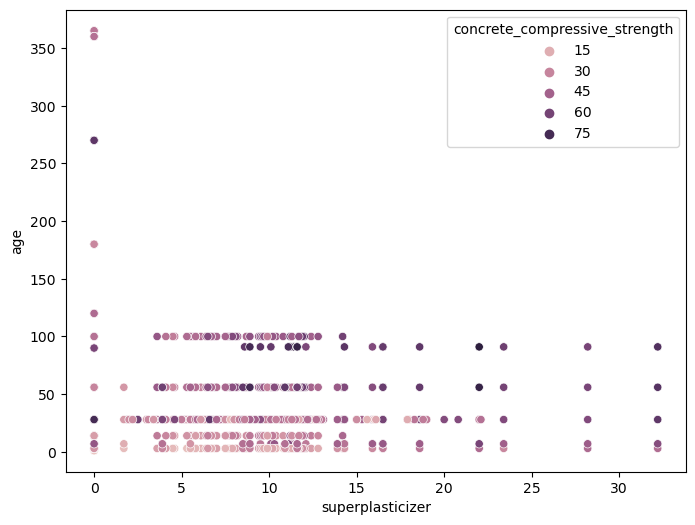

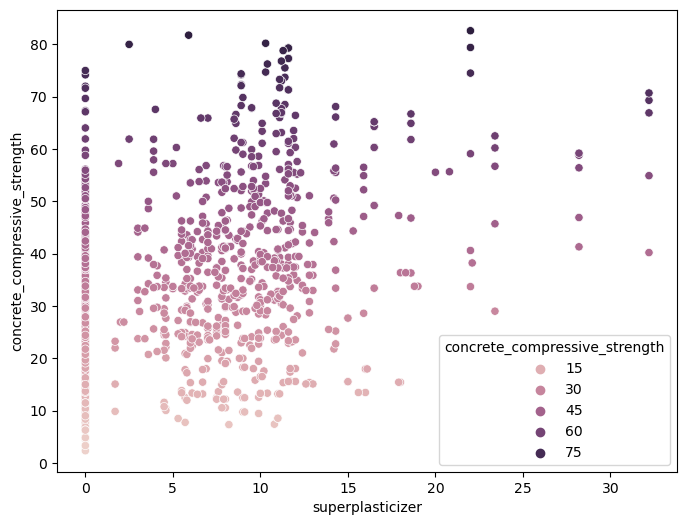

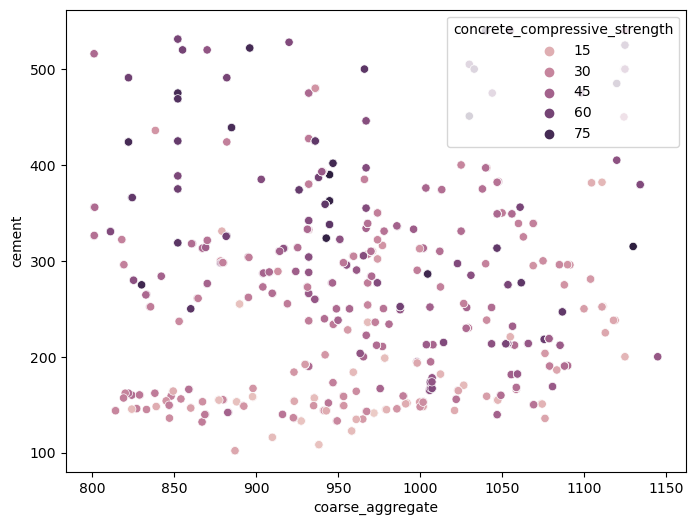

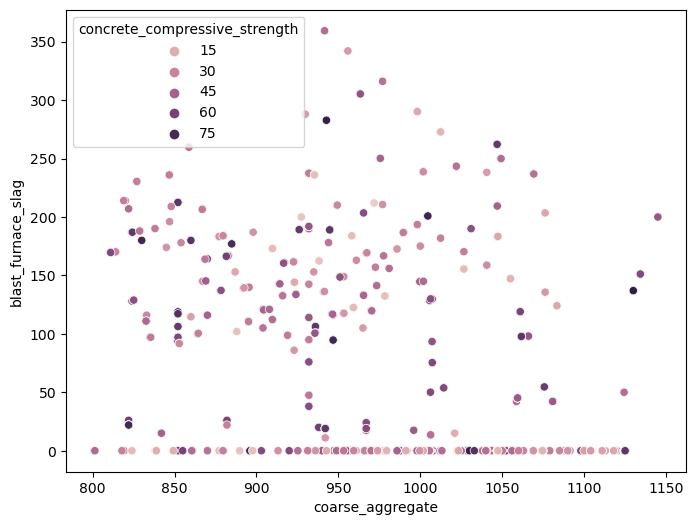

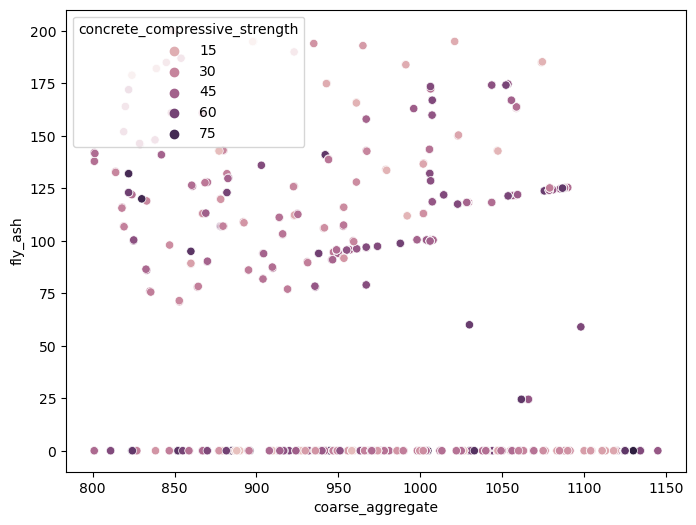

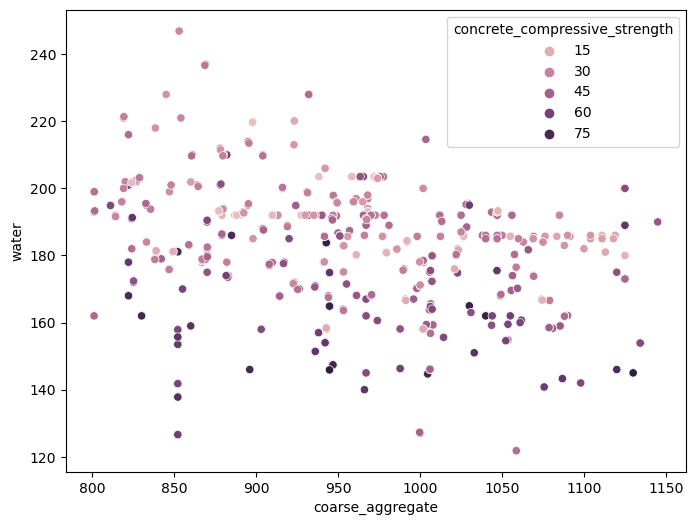

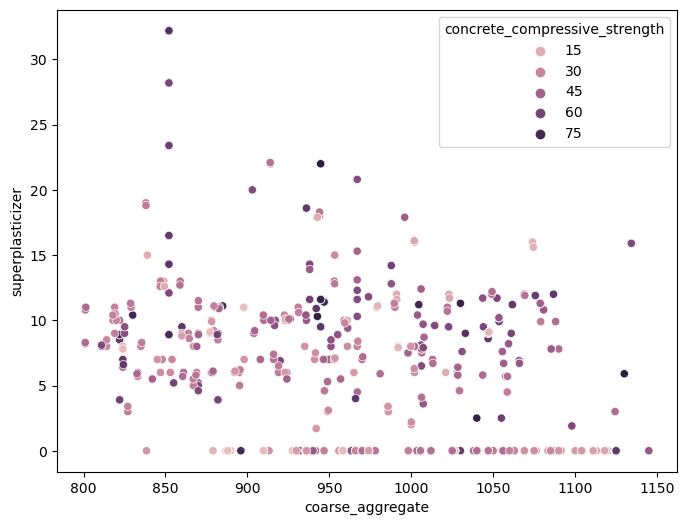

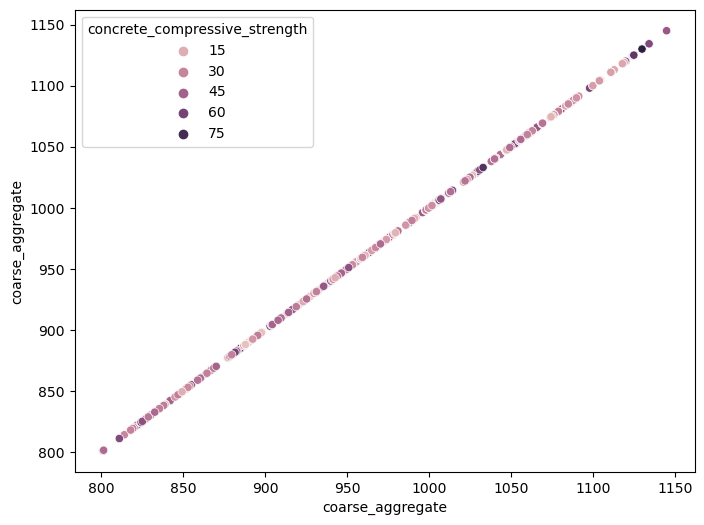

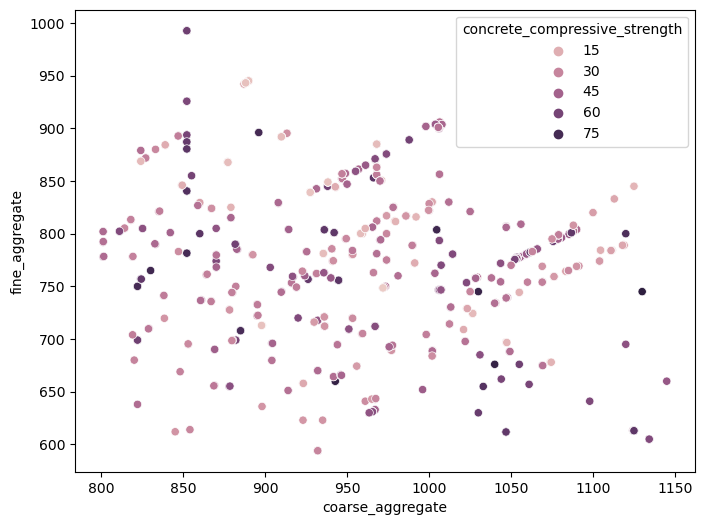

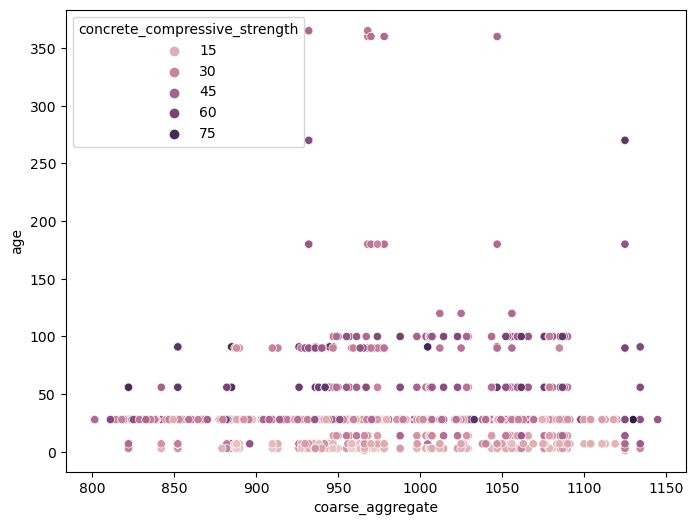

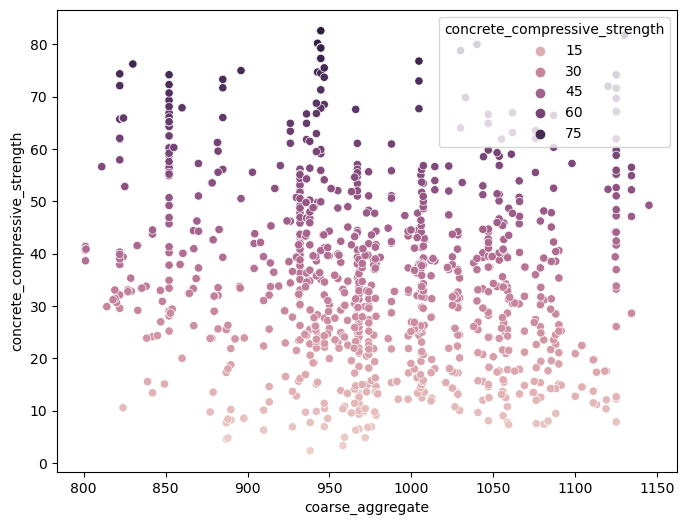

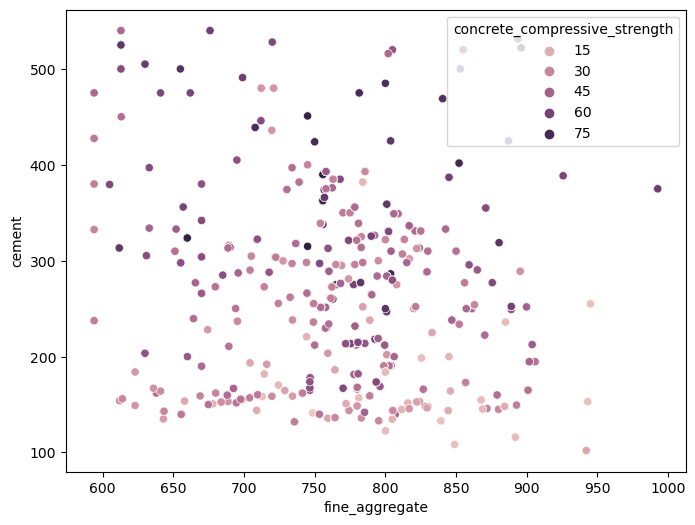

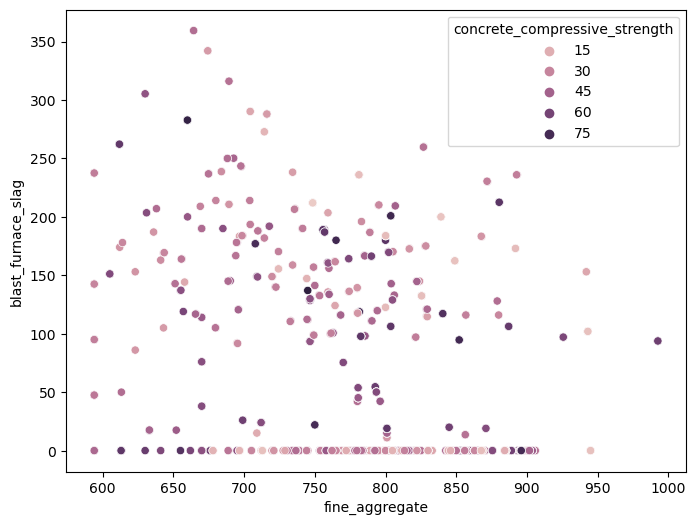

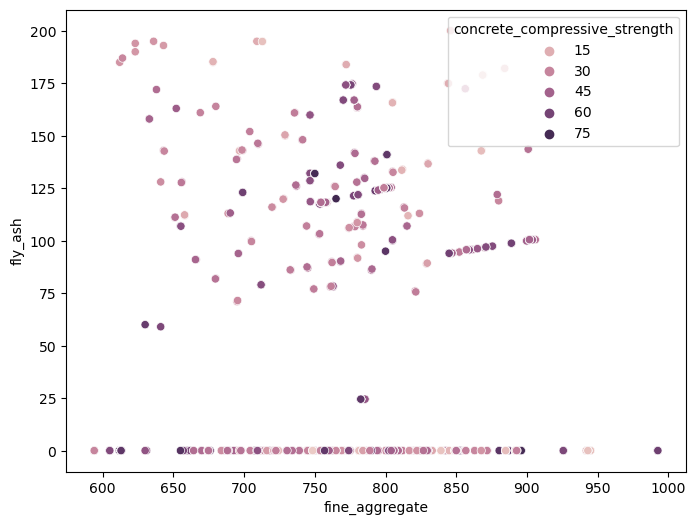

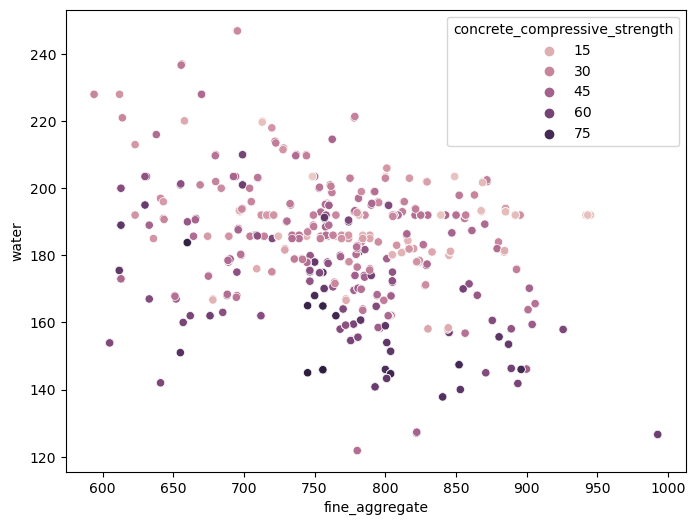

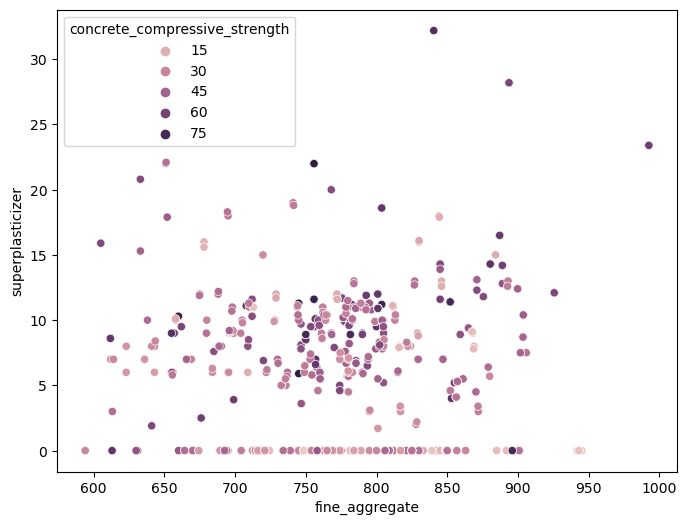

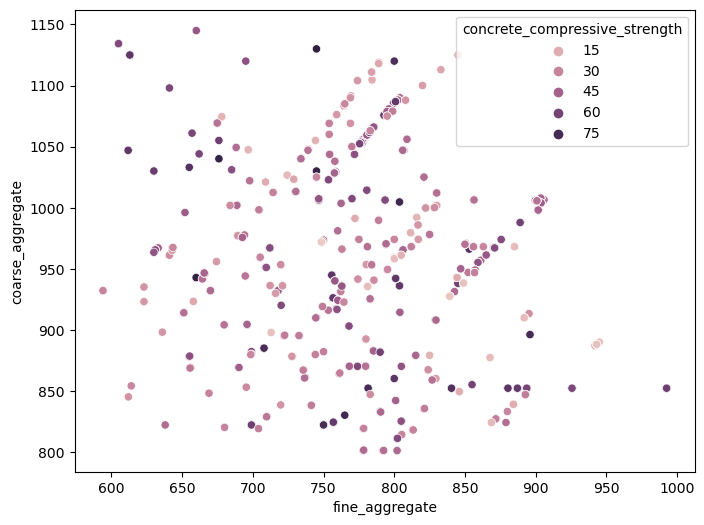

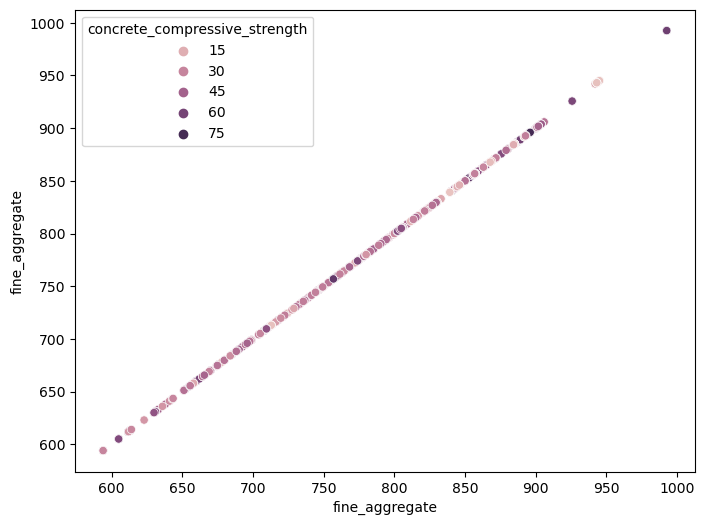

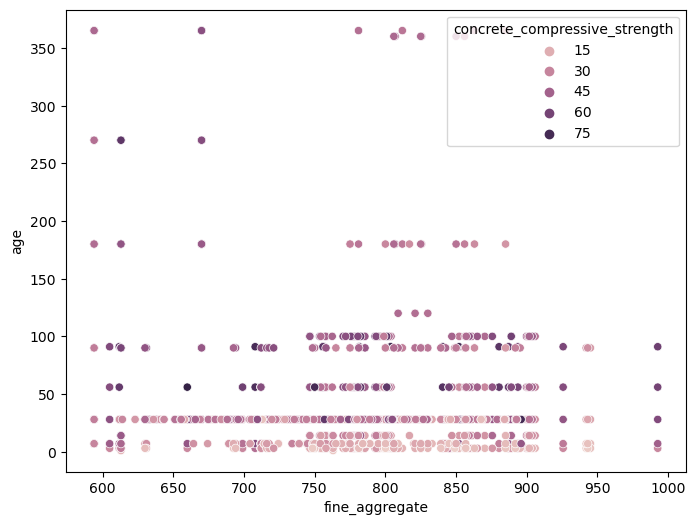

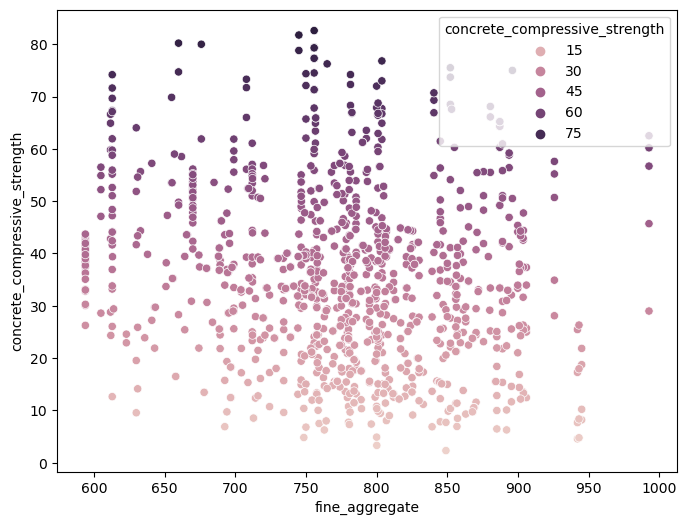

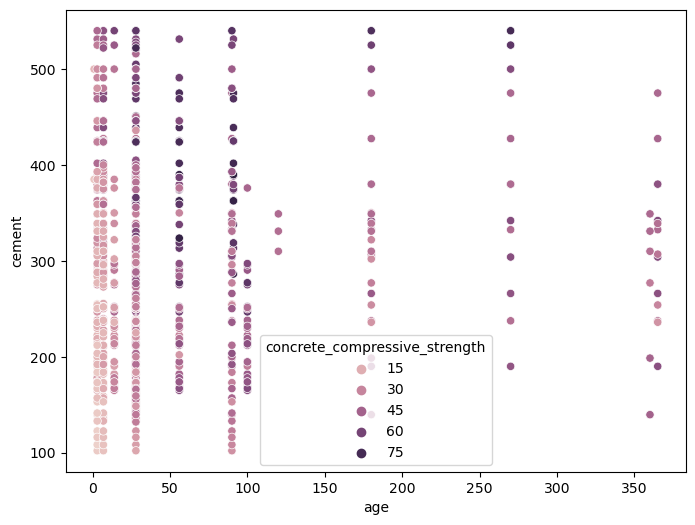

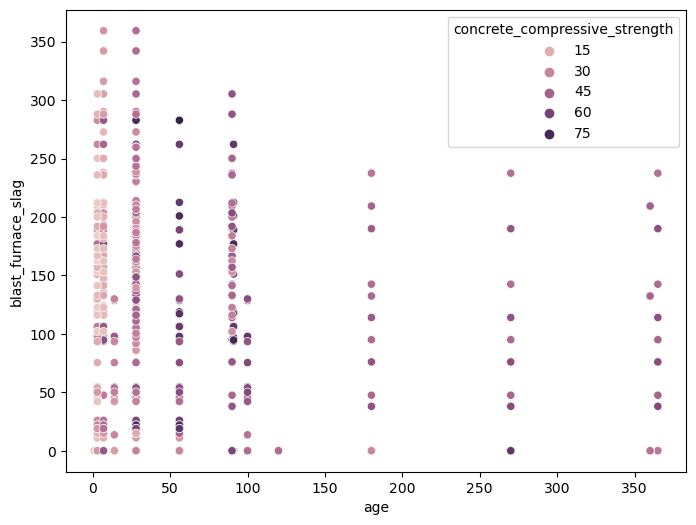

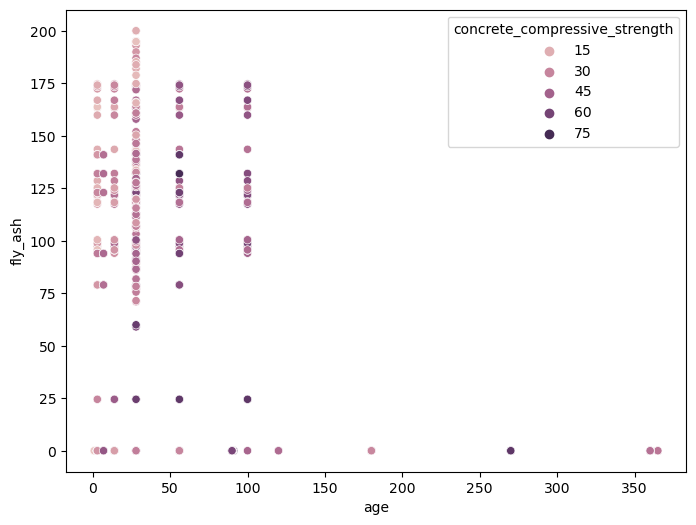

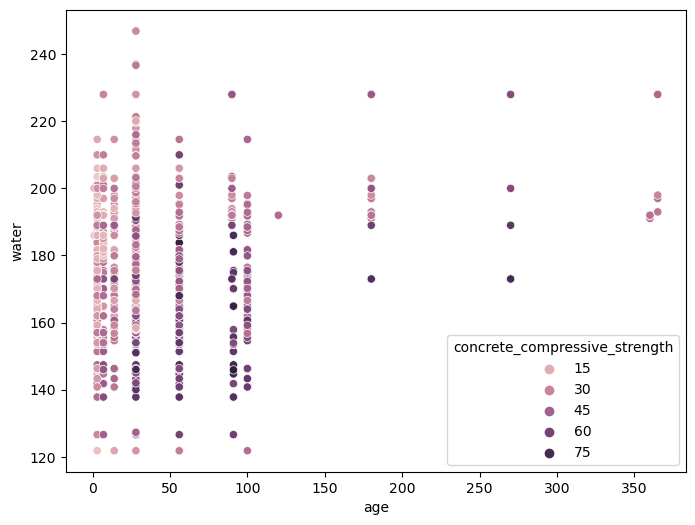

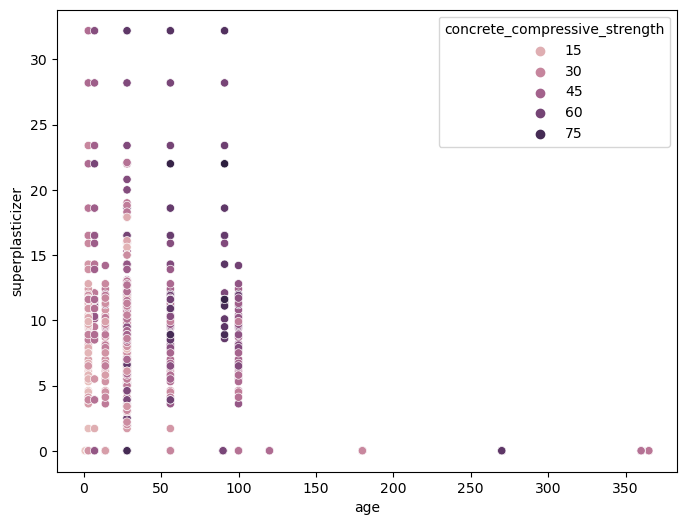

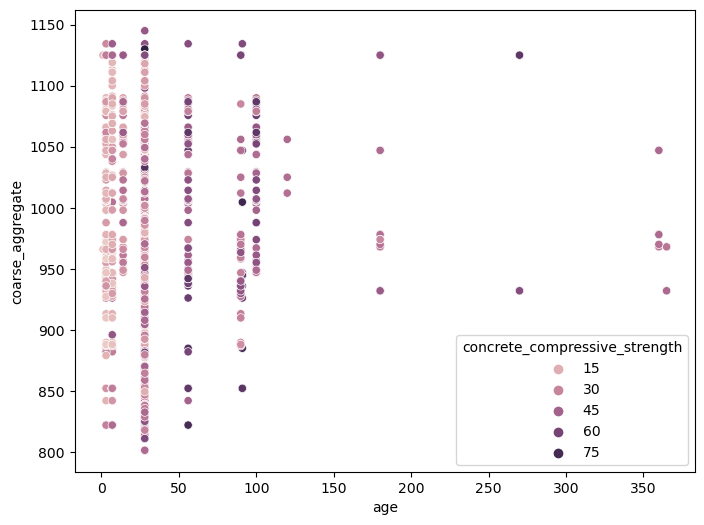

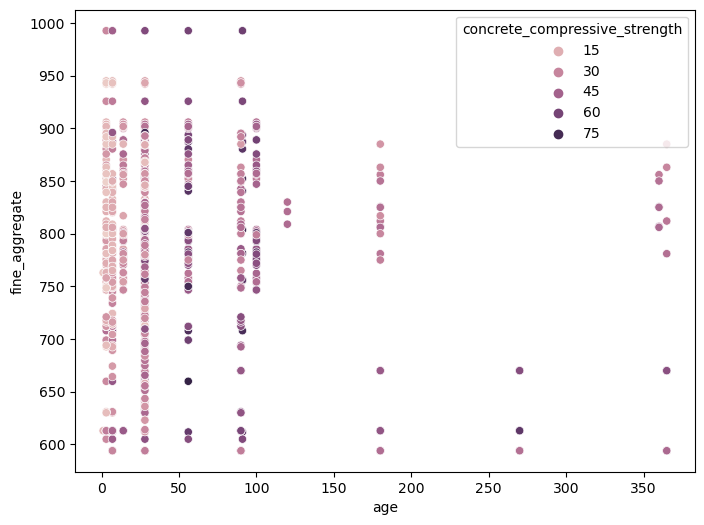

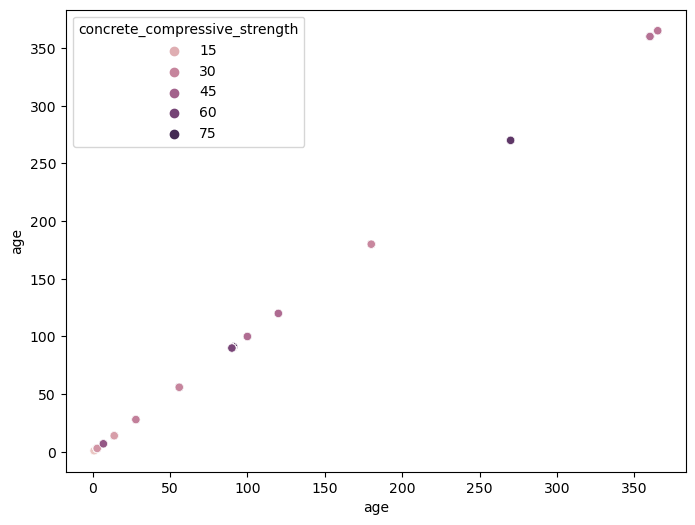

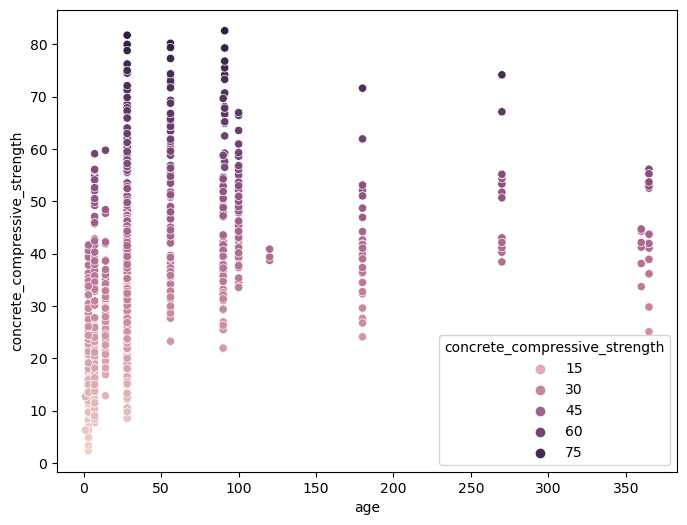

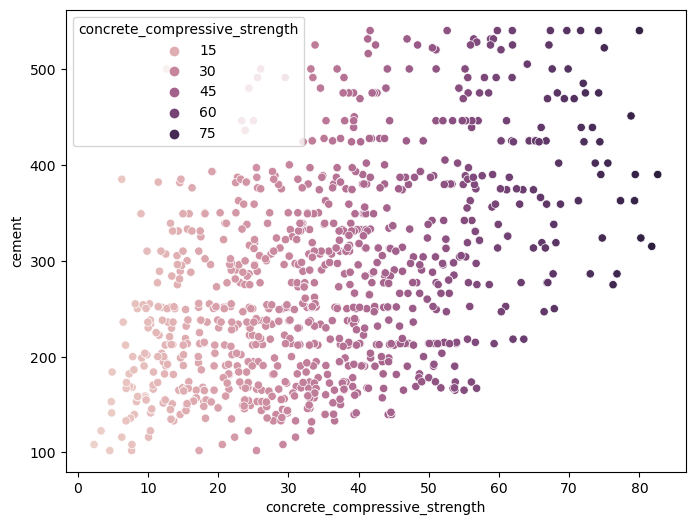

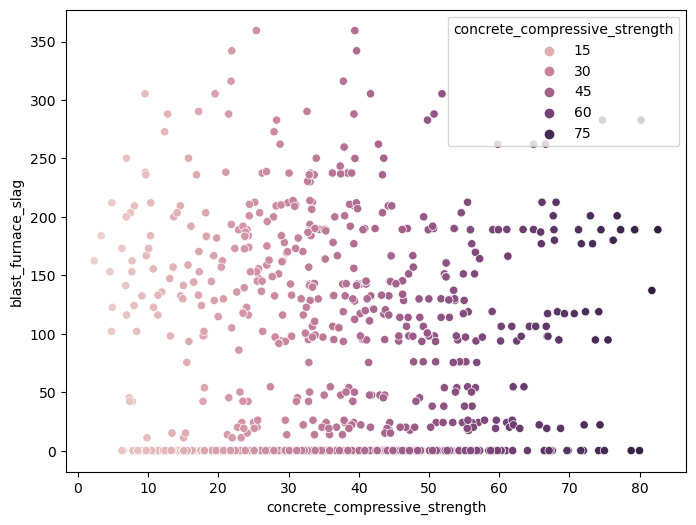

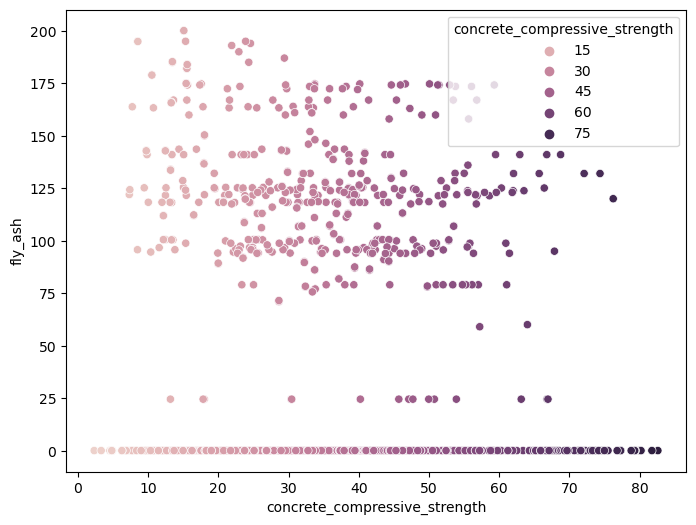

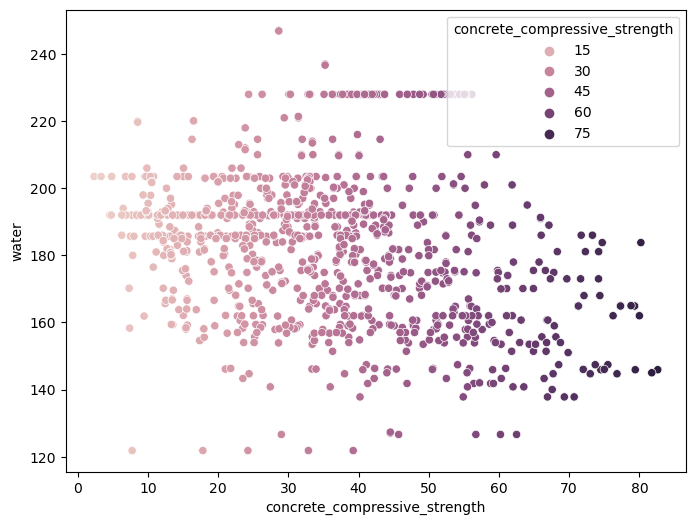

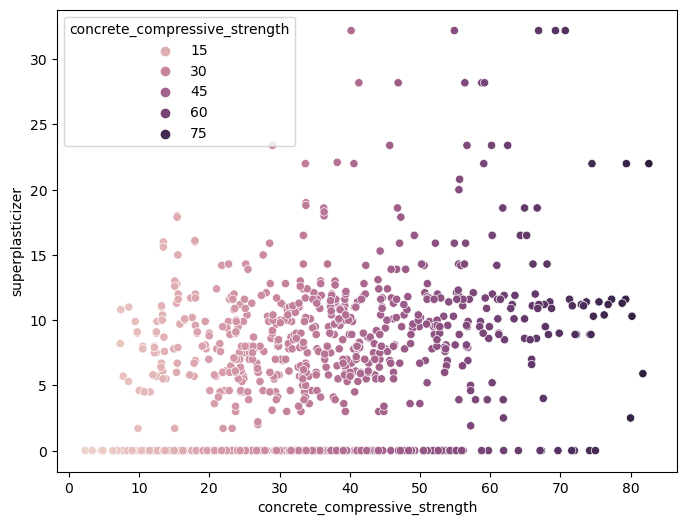

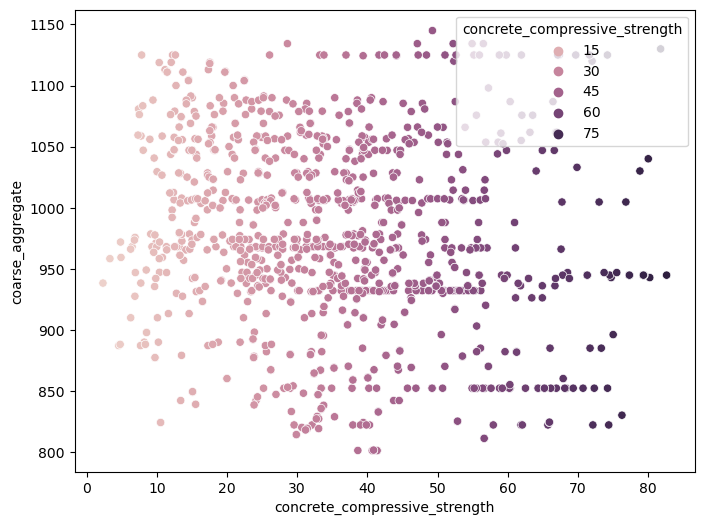

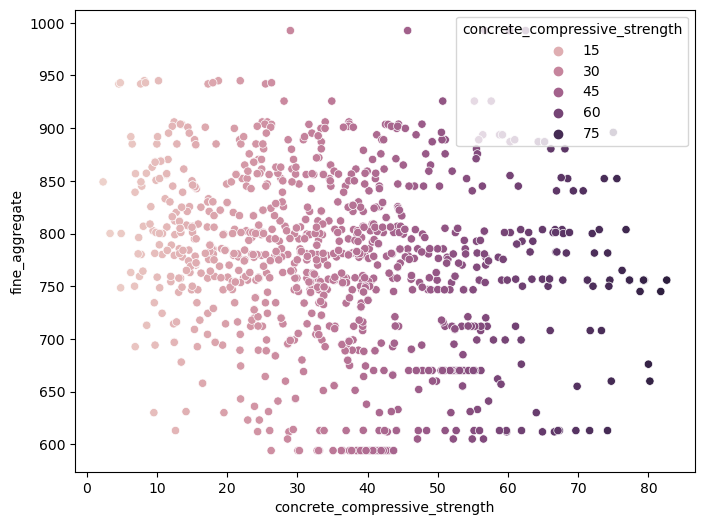

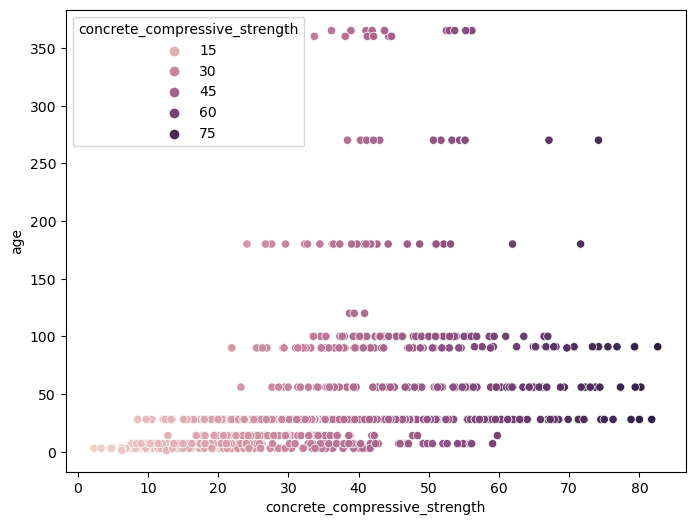

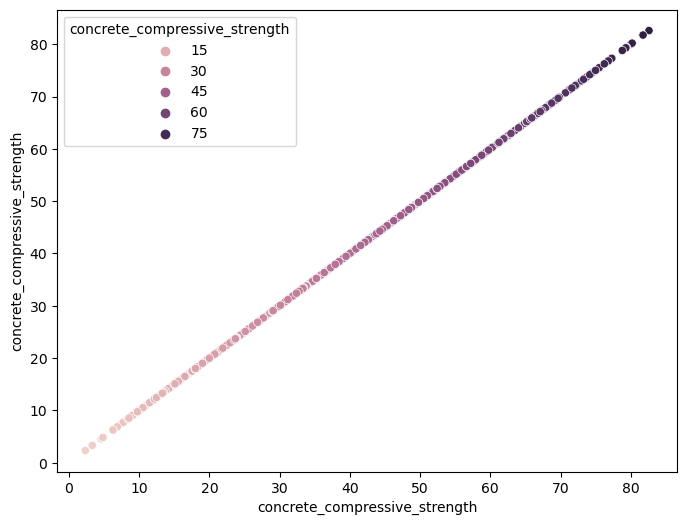

In [10]:
for i in data.columns:
    for j in data.columns:
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=data)

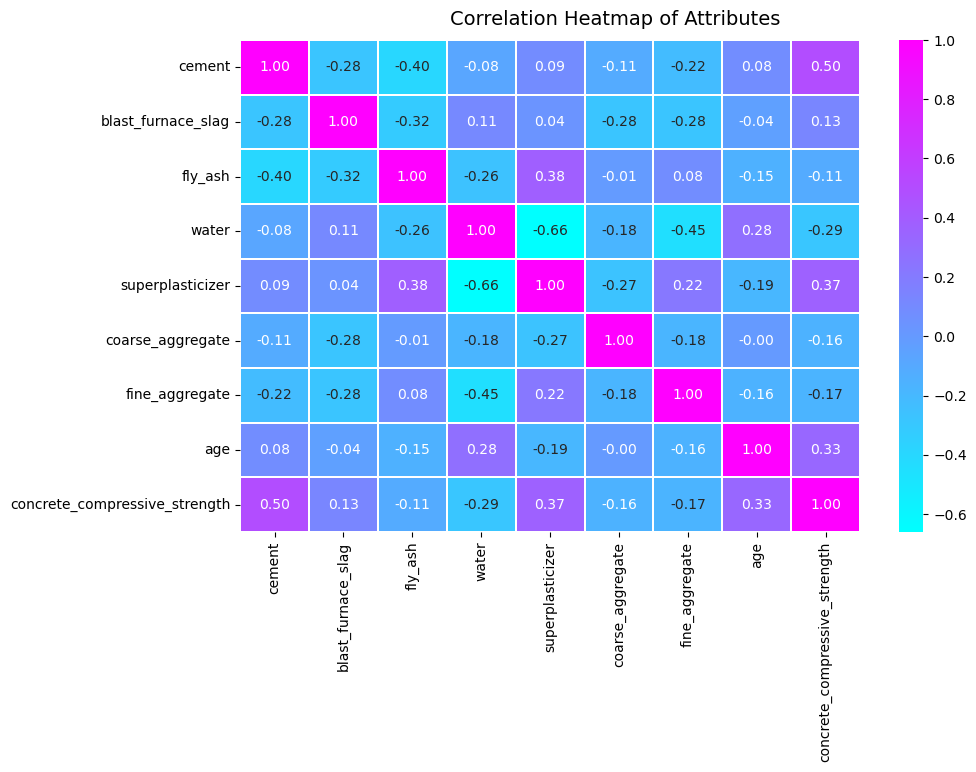

In [11]:
#Corelation
corr = data.corr()
#sns.heatmap(corr)
fig, ax = plt.subplots(figsize=(10, 6))
heatmp = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='cool', fmt='.2f', linewidths=.05)
fig.suptitle('Correlation Heatmap of Attributes', fontsize=14)
fig.subplots_adjust(top=0.93)

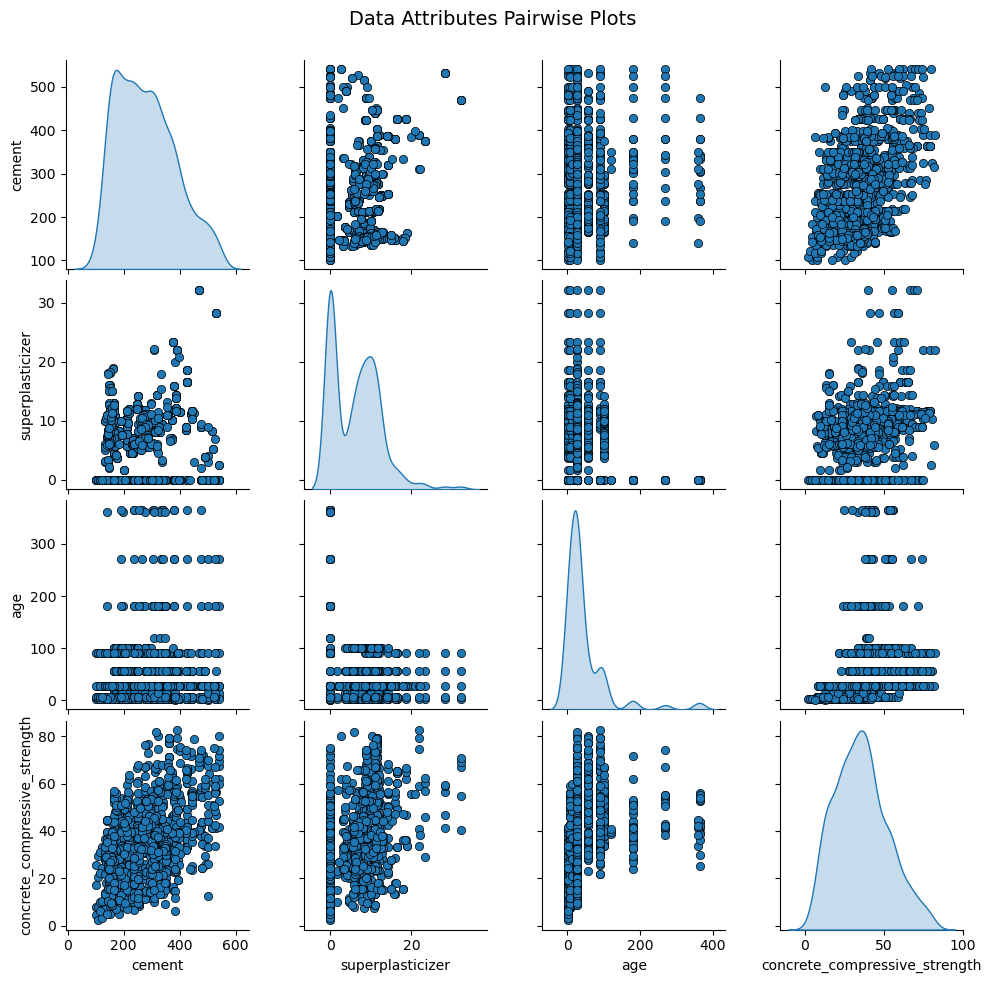

In [12]:
colums = ['cement', 'superplasticizer', 'age', 'concrete_compressive_strength']
pp = sns.pairplot(data[colums],plot_kws={'edgecolor': 'k', 'linewidth': 0.5},diag_kind='kde', diag_kws={'shade': True})
fig = pp.fig
fig.suptitle('Data Attributes Pairwise Plots', fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

## Model Creation
### Train_Test_split

In [13]:
from sklearn.model_selection import train_test_split

features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
         'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']
X = data[features[0:-1]].to_numpy()
y = data[features[-1]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(690, 8)
(340, 8)


## Model Training

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(X_train,y_train)
y_head=lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
lr_score = r2_score(y_test,y_head)
lr_score

0.5969851098437959

### Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
y_head=rfr.predict(X_test)

In [20]:
rfr_score = r2_score(y_test,y_head)
rfr_score

0.8868345767210402

Text(0, 0.5, 'Predicted Data')

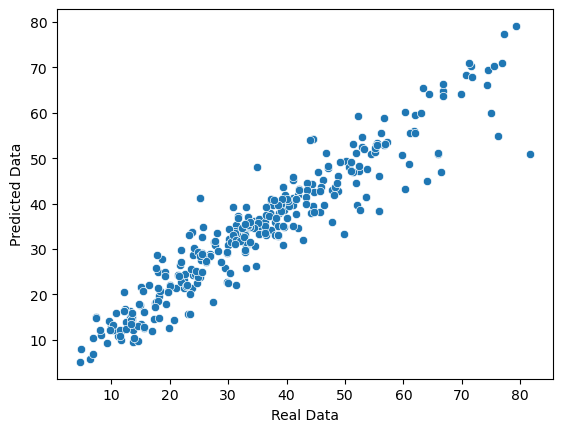

In [21]:
sns.scatterplot(x=y_test,y=y_head)
plt.xlabel("Real Data")
plt.ylabel("Predicted Data")

C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


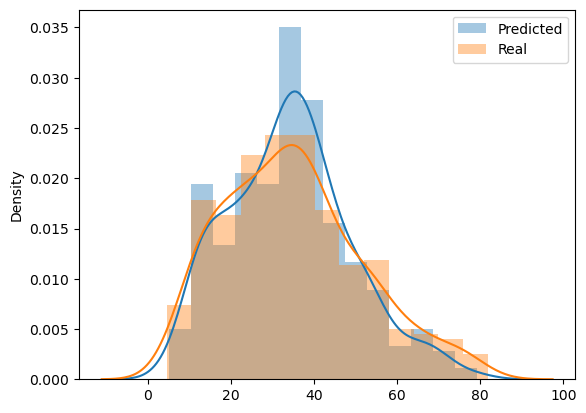

In [22]:
sns.distplot(y_head,label="Predicted")
sns.distplot(y_test,label="Real")
plt.legend()

### Deep Neural

In [23]:
#from tensorflow import keras
#from tensorflow.keras.layers.experimental import preprocessing